In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 10)
pd.set_option('display.max_colwidth', 50)

In [39]:
data = pd.read_csv('AutoScout_data_cleaning_without_extras.csv')
data.head(3)

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
0,Audi,A1,Sedans,1.4,15770,VAT deductible,56013.0,2016.0,2.0,66.0,Used,2.0,Yes,Black,Metallic,Mythosschwarz,Cloth,Black,5.0,5.0,0588/BDF,Automatic,"1,422",3.0,"1,220",Diesel,3.8,4.3,3.5,99.0,Euro 6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D..."
1,Audi,A1,Sedans,1.8,14500,Price negotiable,80000.0,2017.0,NaN,141.0,Used,NaN,NaN,Red,NaN,NaN,Cloth,Grey,3.0,4.0,0588/BCY,Automatic,"1,798",4.0,"1,255",benzine,5.6,7.1,4.7,129.0,Euro 6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r..."
2,Audi,A1,Sedans,1.6,14640,VAT deductible,83450.0,2016.0,1.0,85.0,Used,1.0,NaN,Black,Metallic,mythosschwarz metallic,Cloth,Black,4.0,4.0,NaN,Automatic,"1,598",NaN,NaN,Diesel,3.8,4.4,3.4,99.0,Euro 6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D..."


In [4]:
# data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make                 15919 non-null  object 
 1   model                15919 non-null  object 
 2   body_type            15859 non-null  object 
 3   cc                   10851 non-null  float64
 4   price                15919 non-null  int64  
 5   vat                  11406 non-null  object 
 6   km                   14895 non-null  float64
 7   registration         14322 non-null  float64
 8   prev_owner           9091 non-null   float64
 9   power_hp             15831 non-null  float64
 10  vehicle_condition    15917 non-null  object 
 11  previous_owners      9279 non-null   float64
 12  Inspection_new       3932 non-null   object 
 13  body_color           15322 non-null  object 
 14  paintwork            10147 non-null  object 
 15  body_color_original  12145 non-null 

### İlk olarak "body_type" sütunundaki nan değerleri dolduralım. 60 eksik değer var.

In [5]:
# data["body_type"].value_counts(dropna=False)    # 60 eksik veri var.

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

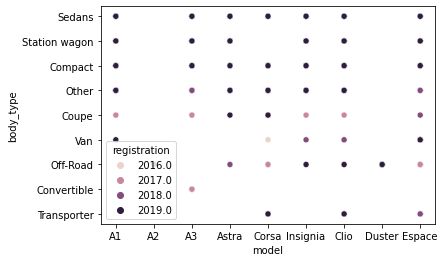

In [6]:
# sns.scatterplot(x="model", y="body_type", hue="registration", data=data);

In [ ]:
# data[~data["body_type"].notna()][["model","registration","model_code","body_type"]]

In [40]:
# 4. yöntem :

f= lambda x : x.mode().iloc[0]

data["body_type"] = data["body_type"].fillna(data.groupby("model")["body_type"].transform(f))

In [27]:
# data["body_type"].value_counts(dropna=False)  # 1.yöntemi kullanırsak.

Sedans           7963
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [33]:
# data["body_type"].value_counts(dropna=False)   # 3. ve 4. yöntemi kullanırsak aynı sonuca ulaşıyoruzb

Sedans           7925
Station wagon    3563
Compact          3155
Van               809
Other             290
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

### "vehicle_condition" sütunundaki 2 eksik değeri dolduralım. Değer sayısı az olduğundan dolayı km, price ve modele bakarak used olarak doldurduk.

In [7]:
# data["vehicle_condition"].value_counts(dropna=False)   # 2 eksik değer var.

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: vehicle_condition, dtype: int64

In [11]:
# data.loc[~data["vehicle_condition"].notna()]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
2765,Audi,A3,Sedans,2.0,17900,NaN,115137.0,2016.0,NaN,110.0,NaN,NaN,NaN,White,NaN,NaN,Cloth,Other,5.0,5.0,NaN,Automatic,"1,968",4.0,NaN,Diesel,4.5,5.3,4.1,118.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment","Alloy wheels,Sport seats,Sport suspension","ABS,Central door lock,Driver-side airbag,Isofix,Passenger-side airbag,Power steering,Side airbag..."
5237,Audi,A3,Sedans,1.6,25400,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,Grey,NaN,NaN,Cloth,Other,5.0,5.0,NaN,Automatic,"1,598",4.0,NaN,Diesel,3.9,4.1,3.7,103.0,Euro 6,Air conditioning,"Bluetooth,Hands-free equipment",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Isofix,Passenger-side airbag,Power steering,Side airbag..."


In [41]:
data.loc[~data["vehicle_condition"].notna(), "vehicle_condition"] = data.loc[~data["vehicle_condition"].notna(), "vehicle_condition"].fillna("Used")

In [9]:
# data["vehicle_condition"].value_counts(dropna=False)

Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: vehicle_condition, dtype: int64

### "km" sütunundaki nan değerleri dolduralım.

In [10]:
# data["km"].value_counts(dropna=False)   # 1024 eksik değer var.

10.0        1045
NaN         1024
1.0          367
5.0          170
50.0         148
            ... 
160542.0       1
20719.0        1
91910.0        1
39860.0        1
57889.0        1
Name: km, Length: 6690, dtype: int64

In [42]:
data.loc[(~data["km"].notna()) & (data["vehicle_condition"]=="New"),"km"] = 0   # km si olmayan bazı araçların yeni olduğunu gördük ve bunları 0 ile doldurduk.

In [24]:
# data.loc[(~data["km"].notna())]

,make,model,body_type,cc,price,vat,km,registration,prev_owner,power_hp,vehicle_condition,previous_owners,Inspection_new,body_color,paintwork,body_color_original,upholstery,interior_color,door_nr,seat_nr,model_code,gear,displacement,cylinders,weight,fuel,consumption_comb,consumption_city,consumption_country,CO2_emission,emission_class,comfort_convenience,entertainment,Extras,safety_security
981,Audi,A1,Sedans,1.4,20999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,White,Uni/basic,BIANCO GHIACCIO,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Electrical side mirrors,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
983,Audi,A1,Sedans,1.4,20999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,Grey,Uni/basic,Grigio Freccia,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
1075,Audi,A1,Sedans,1.4,19999,VAT deductible,NaN,2018.0,1.0,66.0,Pre-registered,1.0,NaN,White,Uni/basic,BIANCO GHIACCIO,NaN,NaN,5.0,4.0,NaN,Automatic,"1,422",NaN,NaN,Diesel,NaN,NaN,NaN,NaN,Euro 6,"Air conditioning,Automatic climate control,Power windows,Split rear seats",NaN,Alloy wheels,"Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stability ..."
1904,Audi,A1,Sedans,NaN,27650,VAT deductible,NaN,2019.0,NaN,85.0,Pre-registered,NaN,NaN,White,Metallic,Bianco,Cloth,Black,5.0,4.0,NaN,Automatic,999,3.0,"1,255",benzine,4.8,5.8,4.2,108.0,Euro 6,"Air conditioning,Automatic climate control,Electrical side mirrors,Leather steering wheel,Multi-...","Bluetooth,Radio,USB",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Emergency brake assistant,..."
1934,Audi,A1,Sedans,NaN,28499,VAT deductible,NaN,2019.0,1.0,85.0,Pre-registered,1.0,NaN,Grey,Metallic,Grigio Chronos,NaN,NaN,5.0,5.0,NaN,Automatic,999,NaN,NaN,benzine,NaN,NaN,NaN,NaN,NaN,"Air conditioning,Automatic climate control,Electrical side mirrors,Park Distance Control,Parking...",Bluetooth,Alloy wheels,"ABS,Central door lock,Central door lock with remote control,Driver-side airbag,Electronic stabil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15782,Renault,Espace,Van,1.6,34150,VAT deductible,NaN,2018.0,NaN,118.0,Pre-registered,NaN,NaN,Grey,Metallic,Grigio scuro,Full leather,Beige,5.0,7.0,NaN,Automatic,"1,598",4.0,"1,659",Diesel,4.7,5.1,4.4,120.0,NaN,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...","Bluetooth,MP3,On-board computer,Radio",Alloy wheels,"ABS,Central door lock,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Pas..."
15806,Renault,Espace,Van,NaN,40999,VAT deductible,NaN,2019.0,1.0,165.0,Demonstration,1.0,Yes,Black,Metallic,Black Pearl,Full leather,Brown,5.0,5.0,3333/BHJ,Automatic,"1,798",4.0,"1,685",benzine,6.8,8.7,5.7,153.0,Euro 6,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,Driver-side airbag,Electronic stability control,Em..."
15837,Renault,Espace,Van,NaN,47450,VAT deductible,NaN,2019.0,1.0,118.0,Pre-registered,1.0,NaN,Black,Metallic,amethyst black,Full leather,Black,5.0,5.0,NaN,Automatic,"1,598",4.0,"1,734",Diesel,4.7,5.1,4.4,123.0,Euro 6,"Air conditioning,Automatic climate control,Cruise control,Electrically adjustable seats,Electric...","Bluetooth,Digital radio,Hands-free equipment,MP3,On-board computer,Radio,USB","Alloy wheels,Catalytic Converter,Touch screen","ABS,Adaptive Cruise Control,Blind spot monitor,Daytime

In [43]:
f= lambda x : x.mean()         # daha sonra kalan nan değerleri ise model ve vehicle_cond göre km lerin ortalaması ile doldurduk.

data["km"] = data["km"].fillna(data.groupby(["model","vehicle_condition"])["km"].transform(f))

In [13]:
# data["km"].value_counts(dropna=False)

10.0        1045
0.0          868
1.0          367
5.0          170
50.0         148
            ... 
160542.0       1
20719.0        1
91910.0        1
39860.0        1
57889.0        1
Name: km, Length: 6712, dtype: int64

In [28]:
# data.groupby(["model", "body_type", "vehicle_condition"]).price.describe()  #"registration" ilave edelim.

count  \
model    body_type     vehicle_condition           
A1       Compact       Demonstration        75.0   
                       Employee's car       79.0   
                       New                 248.0   
                       Pre-registered       19.0   
                       Used                618.0   
...                                          ...   
Insignia Station wagon Employee's car      115.0   
                       New                 206.0   
                       Pre-registered       51.0   
                       Used               1138.0   
         Van           Employee's car        1.0   

                                                  mean  \
model    body_type     vehicle_condition                 
A1       Compact       Demonstration      23404.546667   
                       Employee's car     19955.455696   
                       New                23432.568548   
                       Pre-registered     23055.000000   
                       Used               16758.276699   
...                                                ...   
Insignia Station wagon Employee's car     21677.852174   
                       New                31780.373786   
                       Pre-registered     31558.666667   
                       Used               18001.152021   
         Van           Employee's car     20980.000000   

                                                  std  \
model    body_type     vehicle_condition                
A1       Compact       Demonstration      4097.006937   
                       Employee's car     3803.376017   
                       New                3523.311326   
                       Pre-registered     2307.272921   
                       Used               3180.778682   
...                                               ...   
Insignia Station wagon Employee's car     2255.544841   
                       New                5634.808637   
                       Pre-registered     4564.469199   
                       Used               5038.105438   
         Van           Employee's car             NaN   

                                              min  \
model    body_type     vehicle_condition            
A1       Compact       Demonstration      14900.0   
                       Employee's car     13500.0   
                       New                16220.0   
                       Pre-registered     20885.0   
                       Used                9950.0   
...                                           ...   
Insignia Station wagon Employee's car     18490.0   
                       New                21992.0   
                       Pre-registered     20890.0   
                       Used                8290.0   
         Van           Employee's car     20980.0   

                                               25%  \
model    body_type     vehicle_condition             
A1       Compact       Demonstration      20970.00   
                       Employee's car     16684.50   
                       New                20800.75   
                       Pre-registered     21435.00   
                       Used               14890.00   
...                                            ...   
Insignia Station wagon Employee's car     19945.00   
                       New                26571.25   
                       Pre-registered     29995.00   
                       Used               14050.00   
         Van           Employee's car     20980.00   

                                              50%  \
model    body_type     vehicle_condition            
A1       Compact       Demonstration      22900.0   
                       Employee's car     19700.0   
                       New                22492.5   
                       Pre-registered     22140.0   
                       Used               15955.0   
...                                           ...   
Insignia Station wagon Employee's car     21390.0   

### "vat" sütunundaki nan değerleri dolduralım. Bu veri diğer değişkenlerden bağımsız olduğundan dolayı herhangi bir sütun ile ilişkilendirilemediğinden dolayı mode() ile dolduruldu. 

In [37]:
# data["vat"].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [38]:
# data[~data["vat"].notna()].groupby(["model", "body_type", "vehicle_condition"]).price.describe()  # 4513 eksik veri var.

count          mean          std      min      25%  \
model    body_type     vehicle_condition                                                       
A1       Compact       Employee's car       9.0  22753.333333  6209.092124  13500.0  16900.0   
                       New                 28.0  20807.785714  3514.105991  16220.0  18670.0   
                       Pre-registered       5.0  21760.000000   813.633824  20990.0  21190.0   
                       Used               215.0  15785.423256  2333.688421  11100.0  14425.0   
         Other         Used                 1.0  23490.000000          NaN  23490.0  23490.0   
...                                         ...           ...          ...      ...      ...   
Insignia Station wagon Demonstration       11.0  32386.363636  5699.382901  19200.0  28985.0   
                       Employee's car      15.0  22607.333333  2257.402004  20900.0  21090.0   
                       New                 36.0  28041.888889  4728.323368  21992.0  24203.0   
                       Pre-registered       7.0  32728.571429  2308.473006  30000.0  31150.0   
                       Used               238.0  16468.344538  4148.735883   9000.0  13857.5   

                                              50%       75%      max  
model    body_type     vehicle_condition                              
A1       Compact       Employee's car     22990.0  28400.00  28600.0  
                       New                20091.0  21870.75  29181.0  
                       Pre-registered     21490.0  22140.00  22990.0  
                       Used               15500.0  16462.00  28750.0  
         Other         Used               23490.0  23490.00  23490.0  
...                                           ...       ...      ...  
Insignia Station wagon Demonstration      34490.0  36390.00  38590.0  
                       Employee's car     22500.0  22940.00  29900.0  
                       New                26682.0  30474.25  39977.0  
                       Pre-registered     32500.0  33700.00  36900.0  
                       Used               15594.5  18800.00  33900.0  

[112 rows x 8 columns]

In [39]:
# data[data["vat"].notna()].groupby(["model", "body_type", "vehicle_condition"]).price.describe()

count          mean          std      min       25%  \
model    body_type     vehicle_condition                                                        
A1       Compact       Demonstration       75.0  23404.546667  4097.006937  14900.0  20970.00   
                       Employee's car      70.0  19595.728571  3275.708278  15444.0  16682.25   
                       New                220.0  23766.631818  3389.017250  17330.0  21165.00   
                       Pre-registered      14.0  23517.500000  2508.375777  20885.0  21435.00   
                       Used               403.0  17277.292804  3442.815152   9950.0  14969.50   
...                                         ...           ...          ...      ...       ...   
Insignia Station wagon Employee's car     100.0  21538.430000  2233.193194  18490.0  19900.00   
                       New                170.0  32572.052941  5502.435370  22167.0  27950.00   
                       Pre-registered      44.0  31372.545455  4819.147177  20890.0  29733.75   
                       Used               900.0  18406.494444  5174.766642   8290.0  14480.00   
         Van           Employee's car       1.0  20980.000000          NaN  20980.0  20980.00   

                                              50%       75%      max  
model    body_type     vehicle_condition                              
A1       Compact       Demonstration      22900.0  26985.00  29197.0  
                       Employee's car     19225.0  21893.75  27400.0  
                       New                22590.0  27380.00  31990.0  
                       Pre-registered     23475.0  25257.50  28875.0  
                       Used               16445.0  19900.00  28900.0  
...                                           ...       ...      ...  
Insignia Station wagon Employee's car     20990.0  22760.00  32500.0  
                       New                33236.5  36860.25  52120.0  
                       Pre-registered     31200.0  33051.75  40450.0  
                       Used               18470.0  21800.00  44970.0  
         Van           Employee's car     20980.0  20980.00  20980.0  

[141 rows x 8 columns]

In [44]:
data["vat"] = data["vat"].fillna(data["vat"].mode()[0])

In [15]:
# data["vat"].value_counts(dropna=False)

VAT deductible      15493
Price negotiable      426
Name: vat, dtype: int64

### "registration" sütunundaki nan değerleri dolduralım. 1597 eksik veri var. Eksik verileri tamamlarken "model_code" ve "km" üzerinden değerlendirme yaptım. önce "model_code" göre bazı verileri doldurdum. Sonra km ye göre kalanları doldurdum.

In [16]:
# data["registration"].value_counts(dropna=False)  

2018.0    4522
2016.0    3674
2017.0    3273
2019.0    2853
NaN       1597
Name: registration, dtype: int64

In [81]:
# data.loc[(~data["registration"].notna()) & (data["model_code"].notna()) & (data["km"]==0), ["model","body_type","model_code"]].head(100) # & (data["vehicle_condition"]=="New"),"km"]

,model,body_type,model_code
977,A1,Compact,0588/BHM
1064,A1,Compact,0588/BDB
1098,A1,Compact,0588/BHM
1395,A1,Sedans,0588/AUJ
1467,A1,Compact,0588/BHM
1698,A1,Compact,0588/BHM
2000,A1,Compact,0588/BNP
2014,A1,Compact,0588/BHM
2015,A1,Compact,0588/BNP
2097,A1,Compact,0588/BHM


In [45]:
data.loc[(data["model_code"]=="0588/BNO")&(~data["registration"].notna()), "registration"] = 2019  # bu model arabaların 2019 model olduğunu gördük.

In [46]:
data.loc[(data["model_code"]=="0588/BNN")&(~data["registration"].notna()), "registration"] = 2019   # bu model arabaların 2019 model olduğunu gördük.

In [47]:
data.loc[(data["model_code"]=="3333/BJR")&(~data["registration"].notna()), "registration"] = 2019  # bu model arabaların 2019 model olduğunu gördük.

In [48]:
data.loc[(data["vehicle_condition"]=="New")&(~data["registration"].notna())&(data["km"]<2000), ["registration"]]=2019

# registration dolu olan 2019 model orabaların km mean() 2000 olduğunu gördüm.
# Ve registration boş olanlardan aynı zamanda new olan ve  km si 2000 den küçük olanlara 2019 yılı atadım.

In [49]:
data.loc[(~data["registration"].notna())&(data["km"]<2000), ["registration"]] = 2019

# registration dolu olan 2019 model orabaların km mean() 18000 olduğunu gördüm.
# Ve registration boş olanlardan km si 2000 den küçük olanlara 2019 yılı atadım.

In [50]:
data.loc[(~data["registration"].notna())&(data["km"]<18000), ["registration"]] = 2018

# registration dolu olan 2018 model orabaların km mean() 18000 olduğunu gördüm.
# Ve registration boş olanlardan km si 18000 den küçük olanlara 2018 yılı atadım.

In [51]:
data.loc[(~data["registration"].notna())&(data["km"]<42000), ["registration"]] = 2017

# registration dolu olan 2017 model orabaların km mean() 42000 olduğunu gördüm.
# Ve registration boş olanlardan km si 42000 den küçük olanlara 2017 yılı atadım.

In [52]:
data.loc[~data["registration"].notna(),["registration"]] = 2016

# geri kalan boş değerleri de 2016 yılı ile doldurdum.

In [25]:
# data["registration"].value_counts(dropna=False)

2018.0    4531
2019.0    4425
2016.0    3681
2017.0    3282
Name: registration, dtype: int64

In [130]:
# data.loc[~data["registration"].notna()]["km"].mean()  # registration eksik olanların km olarak ortalaması.

593.0224787819358

In [132]:
# data.loc[data["registration"].notna()]["km"].mean()  # registration dolu olanların km olarak ortalaması.

35058.30276058325

In [118]:
# data.loc[(data["registration"].notna())&(data["registration"]==2019)]["km"].mean()  # registration 2019 olanların km olarak ortalaması.

1999.6694758608462

In [119]:
# data.loc[(data["registration"].notna())&(data["registration"]==2018)]["km"].mean()  # registration 2018 olanların km olarak ortalaması.

17985.679221107577

In [120]:
# data.loc[(data["registration"].notna())&(data["registration"]==2017)]["km"].mean() # registration 2017 olanların km olarak ortalaması.

41753.96848220789

In [131]:
# data.loc[(data["registration"].notna())&(data["registration"]==2016)]["km"].mean()  # registration 2016 olanların km olarak ortalaması.

77442.52095808383

In [113]:
# data[data["registration"].notna()].groupby(["model", "registration", "vehicle_condition"]).km.describe().head(50)

count          mean           std      min       25%  \
model registration vehicle_condition                                                         
A1    2016.0       Employee's car       5.0  48103.800000  30327.711242  26792.0  27000.00   
                   Used               624.0  54382.193910  26268.406892   3150.0  35202.75   
      2017.0       Demonstration        6.0  22963.500000  17802.676830  11940.0  15327.25   
                   Employee's car       8.0  17377.750000   5795.687282   9767.0  11816.75   
                   Pre-registered       1.0     10.000000           NaN     10.0     10.00   
                   Used               417.0  26086.731415  18740.903960    200.0  14300.00   
      2018.0       Demonstration       18.0   9860.666667   5351.243594   1050.0   5200.00   
                   Employee's car     131.0  12199.404580   7558.408070      1.0   6319.50   
                   Pre-registered      17.0    434.204152   1206.701934      9.0     80.00   
                   Used               578.0  14589.496540   7867.173729     10.0   8098.50   
      2019.0       Demonstration      108.0   3798.750000   2519.333665     10.0   2500.00   
                   Employee's car      52.0   4692.371860   4498.792418      1.0    536.25   
                   New                183.0      5.349727     23.982780      0.0      0.00   
                   Pre-registered     128.0     97.177849    320.710405      1.0      6.00   
                   Used               185.0   2864.691892   3824.875155      1.0     20.00   
A2    2018.0       Employee's car       1.0  26166.000000           NaN  26166.0  26166.00   
A3    2016.0       Employee's car       8.0  56954.625000  26796.572462   7790.0  40700.00   
                   Used               810.0  90420.275309  36408.836898     35.0  63014.50   
      2017.0       Demonstration        5.0  27950.000000   9145.354012  16000.0  23000.00   
                   Employee's car      32.0  31584.750000  14949.531463     59.0  23750.00   
                   Used               638.0  44593.115987  27748.116927     15.0  25783.50   
      2018.0       Demonstration       16.0  12801.187500  10920.150153   1015.0   4562.25   
                   Employee's car     157.0  18197.566879   8303.326959      1.0  12000.00   
                   New                  1.0      7.000000           NaN      7.0      7.00   
                   Pre-registered      17.0   1421.764706   3974.791528      1.0     10.00   
                   Used               586.0  19202.484478  11466.789776      1.0  12151.00   
      2019.0       Demonstration       41.0   4971.878049   3092.353369     50.0   3000.00   
                   Employee's car      31.0   3869.451613   5402.688028     10.0    100.00   
                   New                 23.0     27.217391     36.339256      0.0      7.00   
                   Pre-registered     278.0    226.564262    974.453785      1.0     10.00   
                   Used               146.0   4389.342466  12986.967706      1.0     27.00   
Astra 2016.0       Employee's car       1.0  95000.000000           NaN  95000.0  95000.00   
                   Used               518.0  89122.942085  42132.114849  10027.0  57938.50   
      2017.0       Demonstration        1.0  68500.000000           NaN  68500.0  68500.00   
                   Employee's car      12.0  52783.000000  20954.520302  14300.0  38500.00   
                   Pre-registered       1.0   4000.000000           NaN   4000.0   4000.00   
                   Used               573.0  49971.043630  31337.081636     30.0  25000.00   
      2018.0       Demonstration       16.0   7319.937500   7499.404034    100.0   2160.50   
                   Employee's car     121.0  23088.033058   8072.127016     50.0  20040.00   
                   Pre-registered       3.0    816.666667    728.583100     50.0    475.00   
                   Used               587.0  21869.556233  11413.991791      5.0  14000.00

In [ ]:
# data[data["registration"].notna()].groupby(["model", "registration", "vehicle_condition"])

In [ ]:
# 2.yöntem olarak kullanılabilir.

# data.loc[data["km"]<2000, "registration"] = 2019

# data.loc[~data["registration"].notna(), "registration"] = (2019 + 1 - data["km"]//35000).astype("str")

### "prev_owners" sütunundaki nan değerleri dolduralım. 6828 eksik veri var. Bunu 2 şekilde doldurdum. Hangisinin daha etkili olduğuna karar vermek lazım.

In [53]:
# data["prev_owner"].value_counts(dropna=False)

1.0    8294
NaN    6828
2.0     778
3.0      17
4.0       2
Name: prev_owner, dtype: int64

In [78]:
# data[data["prev_owner"].notna()].groupby("registration")["prev_owner"].mean()

registration
2016.0    1.172414
2017.0    1.155335
2018.0    1.024598
2019.0    1.006285
Name: prev_owner, dtype: float64

In [54]:
data.loc[(~data["prev_owner"].notna()) & (data["vehicle_condition"]=="New"), "prev_owner"] = 0  # 1635 satır. 

# New olduklarından dolayı prev_owner 0 atadık. 

In [51]:
# data[~data["prev_owner"].notna()].groupby("registration")["km"].mean()

# Sonrasında boş olanların registration göre km mean() hesapladık.

registration
2016.0    74932.490185
2017.0    42697.169564
2018.0    18098.776297
2019.0     2109.444040
Name: km, dtype: float64

In [57]:
# data[data["prev_owner"].notna()].groupby(["registration","vehicle_condition"])["prev_owner"].describe()

# Yeni durumda registration göre prev_owner istatistik değerlerine baktım. 

count  \
registration vehicle_condition           
2016.0       Demonstration         1.0   
             Employee's car        9.0   
             Pre-registered        1.0   
             Used               2425.0   
2017.0       Demonstration        22.0   
             Employee's car       28.0   
             Pre-registered        6.0   
             Used               1959.0   
2018.0       Demonstration       100.0   
             Employee's car      541.0   
             New                   3.0   
             Pre-registered       99.0   
             Used               2308.0   
2019.0       Demonstration       391.0   
             Employee's car       73.0   
             New                1647.0   
             Pre-registered      739.0   
             Used                374.0   

                                    mean  \
registration vehicle_condition             
2016.0       Demonstration      1.000000   
             Employee's car     1.000000   
             Pre-registered     1.000000   
             Used               1.173196   
2017.0       Demonstration      1.136364   
             Employee's car     1.000000   
             Pre-registered     1.000000   
             Used               1.158244   
2018.0       Demonstration      1.020000   
             Employee's car     1.016636   
             New                0.333333   
             Pre-registered     1.010101   
             Used               1.027296   
2019.0       Demonstration      1.002558   
             Employee's car     1.013699   
             New                0.008500   
             Pre-registered     1.006766   
             Used               1.008021   

                                     std  \
registration vehicle_condition             
2016.0       Demonstration           NaN   
             Employee's car     0.000000   
             Pre-registered          NaN   
             Used               0.392408   
2017.0       Demonstration      0.351250   
             Employee's car     0.000000   
             Pre-registered     0.000000   
             Used               0.378795   
2018.0       Demonstration      0.140705   
             Employee's car     0.128021   
             New                0.577350   
             Pre-registered     0.100504   
             Used               0.162981   
2019.0       Demonstration      0.050572   
             Employee's car     0.117041   
             New                0.091832   
             Pre-registered     0.082032   
             Used               0.089322   

                                min  \
registration vehicle_condition        
2016.0       Demonstration      1.0   
             Employee's car     1.0   
             Pre-registered     1.0   
             Used               1.0   
2017.0       Demonstration      1.0   
             Employee's car     1.0   
             Pre-registered     1.0   
             Used               1.0   
2018.0       Demonstration      1.0   
             Employee's car     1.0   
             New                0.0   
             Pre-registered     1.0   
             Used               1.0   
2019.0       Demonstration      1.0   
             Employee's car     1.0   
             New                0.0   
             Pre-registered     1.0   
             Used               1.0   

                                25%  \
registration vehicle_condition        
2016.0       Demonstration      1.0   
             Employee's car     1.0   
             Pre-registered     1.0   
             Used               1.0   
2017.0       Demonstration      1.0   
             Employee's car     1.0   
             Pre-registered     1.0   
             Used               1.0   
2018.0       Demonstration      1.0   
             Employee's car     1.0   
             New                0.0   
             Pre-registered     1.0   
             Used               1.0   
2019.0       Demonstration      1.0   
             Employee's c

In [56]:
# 1. yöntem olarak registration ve vehicle_condition göre gruplandırıp bunun prev_owner değerlerinin mean() nan değerlere atadım.

f= lambda x : x.mode().iloc[0]

data["prev_owner"] = data["prev_owner"].fillna(data.groupby(["registration","vehicle_condition"])["prev_owner"].transform(f))

In [57]:
data["prev_owner"].value_counts(dropna=False)  # 1. yönteme göre çıkan değerler.

1.0    13487
0.0     1635
2.0      778
3.0       17
4.0        2
Name: prev_owner, dtype: int64

In [30]:
# data["prev_owner"].apply(np.round).value_counts(dropna=False)   # 1. yöntemde mode() yerine mean() kullanırsak çıkan değerler.

1.0    13376
0.0     1635
2.0      866
NaN       23
3.0       17
4.0        2
Name: prev_owner, dtype: int64

In [80]:
# 2. yöntem olarak da prev_owner boş olanların registration=2019 olanlara 0, diğerlerine 1 atadım.

# data.loc[(~data["prev_owner"].notna()) & (data["registration"]== 2019),"prev_owner"] = 0

# data.loc[(~data["prev_owner"].notna()) & (data["registration"]< 2019),"prev_owner"] = 1

In [82]:
# data["prev_owner"].value_counts(dropna=False) # 2. yönteme göre de çıkan değerler aşağıdaki gibi oldu. 

1.0    12286
0.0     2836
2.0      778
3.0       17
4.0        2
Name: prev_owner, dtype: int64

### "hp" sütunundaki nan değerleri dolduralım. 88 eksik veri var. Burada eksik değerleri model, vehicle_condition ve registration göre gruplandırıp bunların power_hp değerlerinin mode() alıp bunu boş değerlere atadım.

In [58]:
# data["power_hp"].value_counts(dropna=False)

85.0     2542
66.0     2122
81.0     1402
100.0    1308
110.0    1112
70.0      888
125.0     707
51.0      695
55.0      569
118.0     516
92.0      466
121.0     392
147.0     380
77.0      345
56.0      286
54.0      276
103.0     253
87.0      232
165.0     194
88.0      177
60.0      160
162.0      98
NaN        88
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
82.0       22
52.0       22
1.0        20
78.0       20
146.0      18
294.0      18
141.0      16
57.0       10
120.0       8
104.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
90.0        4
76.0        4
65.0        4
149.0       3
98.0        3
93.0        3
80.0        3
168.0       3
150.0       2
63.0        2
140.0       2
86.0        2
89.0        2
40.0        2
167.0       2
53.0        2
228.0       2
127.0       2
143.0       2
270.0       2
9.0         1
44.0        1
123.0       1
195.0 

In [59]:
f= lambda x : x.mode().iloc[0]

data["power_hp"] = data["power_hp"].fillna(data.groupby(["model","body_type","registration"])["power_hp"].transform(f))

In [60]:
# data["power_hp"].value_counts(dropna=False)

85.0     2544
66.0     2124
81.0     1403
100.0    1314
110.0    1113
70.0      889
125.0     710
51.0      695
55.0      592
118.0     548
92.0      466
121.0     393
147.0     380
77.0      353
56.0      290
54.0      276
103.0     253
87.0      234
165.0     196
88.0      177
60.0      160
162.0      98
74.0       81
96.0       72
71.0       59
101.0      47
67.0       40
154.0      39
122.0      35
119.0      30
164.0      27
135.0      24
52.0       22
82.0       22
78.0       20
1.0        20
146.0      18
294.0      18
141.0      16
57.0       10
120.0       8
104.0       8
191.0       7
112.0       7
155.0       6
117.0       6
184.0       5
76.0        4
65.0        4
90.0        4
80.0        3
98.0        3
168.0       3
93.0        3
149.0       3
150.0       2
89.0        2
63.0        2
86.0        2
53.0        2
270.0       2
127.0       2
228.0       2
40.0        2
143.0       2
167.0       2
140.0       2
239.0       1
44.0        1
195.0       1
132.0       1
133.0 

In [93]:
# data.loc[data["power_hp"].notna()].groupby(["model","body_type","registration"])["power_hp"].describe()

count  \
model    body_type     registration          
A1       Compact       2016.0        234.0   
                       2017.0        161.0   
                       2018.0        269.0   
                       2019.0        373.0   
         Coupe         2016.0          1.0   
...                                    ...   
Insignia Station wagon 2016.0        435.0   
                       2017.0        305.0   
                       2018.0        481.0   
                       2019.0        390.0   
         Van           2018.0          1.0   

                                           mean  \
model    body_type     registration               
A1       Compact       2016.0         72.940171   
                       2017.0         77.267081   
                       2018.0         71.371747   
                       2019.0         83.745308   
         Coupe         2016.0         70.000000   
...                                         ...   
Insignia Station wagon 2016.0        110.416092   
                       2017.0        112.114754   
                       2018.0        116.609148   
                       2019.0        126.141026   
         Van           2018.0        121.000000   

                                           std  \
model    body_type     registration              
A1       Compact       2016.0        10.038373   
                       2017.0        12.012888   
                       2018.0        10.450099   
                       2019.0        12.670642   
         Coupe         2016.0              NaN   
...                                        ...   
Insignia Station wagon 2016.0        15.543879   
                       2017.0        19.466147   
                       2018.0         9.870043   
                       2019.0        20.770706   
         Van           2018.0              NaN   

                                       min  \
model    body_type     registration          
A1       Compact       2016.0         60.0   
                       2017.0         60.0   
                       2018.0         60.0   
                       2019.0         70.0   
         Coupe         2016.0         70.0   
...                                    ...   
Insignia Station wagon 2016.0         88.0   
                       2017.0          1.0   
                       2018.0        100.0   
                       2019.0         81.0   
         Van           2018.0        121.0   

                                       25%  \
model    body_type     registration          
A1       Compact       2016.0         66.0   
                       2017.0         70.0   
                       2018.0         66.0   
                       2019.0         85.0   
         Coupe         2016.0         70.0   
...                                    ...   
Insignia Station wagon 2016.0        100.0   
                       2017.0        100.0   
                       2018.0        103.0   
                       2019.0        104.0   
         Van           2018.0        121.0   

                                       50%  \
model    body_type     registration          
A1       Compact       2016.0         70.0   
                       2017.0         70.0   
                       2018.0         70.0   
                       2019.0         85.0   
         Coupe         2016.0         70.0   
...                                    ...   
Insignia Station wagon 2016.0        100.0   
                       2017.0        121.0   
                       2018.0        121.0   
                       2019.0        125.0   
         Van           2018.0        121.0   

                                       75%  \
model    body_type     registration          
A1       Compact       2016.0         81.5   
                       2017.0         92.0   
                       2018.0         70.0   
                       2019.0         85.0   
         Coupe         2016.0         70.0   
... 

In [63]:
data["vehicle_condition"].value_counts(dropna=False)

Used              11098
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: vehicle_condition, dtype: int64

### "Inspection_new" sütunundaki nan değerleri dolduralım. 11987 eksik veri var. Burada eksik değerleri model, registration, vehicle_condition göre gruplandırıp bunların price olarak istatistik değerlerini incelediğimizde mua. yapılmayanların used özellikte araçlar olduğunu ve bunların fiyatlarının az da olsa mua. yapılanlara göre daha düşük olduğunu gördüm. Dolayısıyla eksik değerleri muayenesi yeni olmayan olarak değerlendirip bunlara No atadım. 

In [65]:
# data["Inspection_new"].value_counts(dropna=False)

NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64

In [66]:
# data.loc[data["Inspection_new"].notna()].groupby(["model","registration","vehicle_condition"])["price"].describe()

count  \
model    registration vehicle_condition          
A1       2016.0       Used               223.0   
         2017.0       Demonstration        2.0   
                      Pre-registered       1.0   
                      Used                96.0   
         2018.0       Demonstration       10.0   
                      Employee's car      36.0   
                      Pre-registered       2.0   
                      Used               222.0   
         2019.0       Demonstration       49.0   
                      Employee's car      17.0   
                      New                103.0   
                      Pre-registered       5.0   
                      Used                22.0   
A3       2016.0       Used               154.0   
         2017.0       Demonstration        1.0   
                      Used               101.0   
         2018.0       Demonstration       13.0   
                      Employee's car       8.0   
                      Pre-registered       1.0   
                      Used                62.0   
         2019.0       Demonstration       25.0   
                      Employee's car       5.0   
                      New                108.0   
                      Pre-registered      20.0   
                      Used                21.0   
Astra    2016.0       Used               178.0   
         2017.0       Used               154.0   
         2018.0       Demonstration        1.0   
                      Employee's car      18.0   
                      Used               205.0   
         2019.0       Demonstration       32.0   
                      Employee's car      16.0   
                      New                 81.0   
                      Pre-registered      58.0   
                      Used                56.0   
Clio     2016.0       Used                34.0   
         2017.0       Used                36.0   
         2018.0       Demonstration        8.0   
                      Employee's car      23.0   
                      New                  1.0   
                      Pre-registered       9.0   
                      Used                70.0   
         2019.0       Demonstration        4.0   
                      New                 17.0   
                      Pre-registered      30.0   
                      Used                 5.0   
Corsa    2016.0       Used               131.0   
         2017.0       Used                64.0   
         2018.0       Demonstration        3.0   
                      Employee's car      14.0   
                      Pre-registered       6.0   
                      Used               133.0   
         2019.0       Demonstration       23.0   
                      Employee's car       9.0   
                      New                 50.0   
                      Pre-registered     173.0   
                      Used                63.0   
Espace   2016.0       Used                35.0   
         2017.0       Used                 6.0   
         2018.0       Demonstration        8.0   
                      Employee's car      11.0   
                      Pre-registered       1.0   
                      Used                22.0   
         2019.0       Demonstration       15.0   
                      Employee's car       1.0   
                      New                 16.0   
                      Pre-registered      54.0   
                      Used                 8.0   
Insignia 2016.0       Used               157.0   
         2017.0       Demonstration        3.0   
                      Employee's car       1.0   
                      Used               127.0   
         2018.0       Demonstration        1.0   
                      Employee's car      31.0   
                      Pre-registered       1.0   
                      Used               277.0   
         2019.0       Demonstration       44.0   
                      Employee's car       1.0   
                      New                

In [67]:
# data.loc[~data["Inspection_new"].notna()].groupby(["model","registration","vehicle_condition"])["price"].describe()

count  \
model    registration vehicle_condition          
A1       2016.0       Employee's car       5.0   
                      Used               401.0   
         2017.0       Demonstration        4.0   
                      Employee's car       8.0   
                      Used               323.0   
...                                        ...   
Insignia 2019.0       Demonstration      117.0   
                      Employee's car       4.0   
                      New                293.0   
                      Pre-registered      52.0   
                      Used                59.0   

                                                 mean  \
model    registration vehicle_condition                 
A1       2016.0       Employee's car     16740.000000   
                      Used               14474.623441   
         2017.0       Demonstration      17414.750000   
                      Employee's car     18943.750000   
                      Used               16549.117647   
...                                               ...   
Insignia 2019.0       Demonstration      34939.649573   
                      Employee's car     28572.500000   
                      New                31096.184300   
                      Pre-registered     30689.557692   
                      Used               31260.745763   

                                                 std  \
model    registration vehicle_condition                
A1       2016.0       Employee's car     2609.214441   
                      Used               1865.071488   
         2017.0       Demonstration      1935.974410   
                      Employee's car     2014.312626   
                      Used               2151.746899   
...                                              ...   
Insignia 2019.0       Demonstration      3714.650773   
                      Employee's car     5890.078522   
                      New                6204.521285   
                      Pre-registered     3259.828243   
                      Used               5008.888364   

                                             min  \
model    registration vehicle_condition            
A1       2016.0       Employee's car     13500.0   
                      Used                8999.0   
         2017.0       Demonstration      15869.0   
                      Employee's car     15750.0   
                      Used               10999.0   
...                                          ...   
Insignia 2019.0       Demonstration      22999.0   
                      Employee's car     19900.0   
                      New                19902.0   
                      Pre-registered     22990.0   
                      Used               21900.0   

                                              25%  \
model    registration vehicle_condition             
A1       2016.0       Employee's car     14300.00   
                      Used               13380.00   
         2017.0       Demonstration      15952.25   
                      Employee's car     18712.50   
                      Used               15195.00   
...                                           ...   
Insignia 2019.0       Demonstration      32990.00   
                      Employee's car     27400.00   
                      New                25692.00   
                      Pre-registered     28937.50   
                      Used               27095.00   

                                             50%  \
model    registration vehicle_condition            
A1       2016.0       Employee's car     18500.0   
                      Used               13999.0   
         2017.0       Demonstration      16900.0   
                      Employee's car     19700.0   
                      Used               15850.0   
...                                          ...   
Insignia 2019.0       Demonstration      35150.0   
                      Employee's car     30945.0   
                      New       

In [69]:
data.loc[~data["Inspection_new"].notna(), "Inspection_new"] = "No"

In [70]:
# data["Inspection_new"].value_counts(dropna=False)

No     11987
Yes     3932
Name: Inspection_new, dtype: int64

### "body_color" sütunundaki nan değerleri dolduralım. 597 eksik veri var. Eksik değerlerin hangi model ve body_type olduklarına baktık. Ve bunların mode() değerine göre yüksek olanları doldurdum. Sonra kalanları ise en çok tercih edilen renk ile doldurdum.

In [75]:
data["body_color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

In [161]:
data[~data["body_color"].notna()][["model","body_type"]].value_counts()  # boş olanların hangi model ve type olduklarına baktım.

model     body_type    
Insignia  Station wagon    103
          Sedans           103
Astra     Station wagon     75
A3        Sedans            60
Astra     Sedans            52
A1        Compact           44
          Sedans            29
Clio      Compact           24
Corsa     Compact           19
Espace    Van               14
Clio      Station wagon     13
Astra     Compact           10
Corsa     Sedans             9
A3        Station wagon      7
Clio      Sedans             7
Insignia  Other              6
A3        Compact            5
Insignia  Off-Road           4
Espace    Coupe              2
          Station wagon      2
          Sedans             2
Astra     Other              2
Clio      Transporter        2
Insignia  Compact            1
          Coupe              1
A3        Other              1
dtype: int64

In [151]:
# f= lambda x : x.mode().iloc[0]    çalışmadı?????

# data["body_color"] = data["body_color"].fillna(data.groupby(["model","body_type"])).transform(f)

TypeError: "value" parameter must be a scalar, dict or Series, but you passed a "DataFrameGroupBy"

In [163]:
data.loc[~data["body_color"].notna()].groupby(["model","body_type"])["price"].describe()   # "registration" ilave edilebilir.

count  \
model    body_type              
A1       Compact         44.0   
         Sedans          29.0   
A3       Compact          5.0   
         Other            1.0   
         Sedans          60.0   
         Station wagon    7.0   
Astra    Compact         10.0   
         Other            2.0   
         Sedans          52.0   
         Station wagon   75.0   
Clio     Compact         24.0   
         Sedans           7.0   
         Station wagon   13.0   
         Transporter      2.0   
Corsa    Compact         19.0   
         Sedans           9.0   
Espace   Coupe            2.0   
         Sedans           2.0   
         Station wagon    2.0   
         Van             14.0   
Insignia Compact          1.0   
         Coupe            1.0   
         Off-Road         4.0   
         Other            6.0   
         Sedans         103.0   
         Station wagon  103.0   

                                mean  \
model    body_type                     
A1       Compact        20291.840909   
         Sedans         20377.310345   
A3       Compact        23464.000000   
         Other          12550.000000   
         Sedans         22490.133333   
         Station wagon  23365.857143   
Astra    Compact        16636.600000   
         Other           9507.500000   
         Sedans         19019.846154   
         Station wagon  18895.013333   
Clio     Compact        13734.541667   
         Sedans         13958.857143   
         Station wagon  12232.230769   
         Transporter     8390.000000   
Corsa    Compact        11166.263158   
         Sedans         11116.888889   
Espace   Coupe          30567.000000   
         Sedans         25995.000000   
         Station wagon  33810.000000   
         Van            32822.428571   
Insignia Compact        19900.000000   
         Coupe          17094.000000   
         Off-Road       32854.750000   
         Other          18556.666667   
         Sedans         25789.184466   
         Station wagon  26716.689320   

                                std  \
model    body_type                    
A1       Compact        3456.615867   
         Sedans         3872.914693   
A3       Compact        4847.017021   
         Other                  NaN   
         Sedans         2531.806480   
         Station wagon  1541.732189   
Astra    Compact        1098.444881   
         Other          1438.962300   
         Sedans         3885.477498   
         Station wagon  4124.452932   
Clio     Compact        2655.964395   
         Sedans         4441.847905   
         Station wagon  2350.712770   
         Transporter    1414.213562   
Corsa    Compact        1855.313626   
         Sedans         2421.023102   
Espace   Coupe          5052.985058   
         Sedans            0.000000   
         Station wagon  6335.676759   
         Van            7726.647514   
Insignia Compact                NaN   
         Coupe                  NaN   
         Off-Road       1387.646058   
         Other          1784.944444   
         Sedans         4709.351872   
         Station wagon  5362.412137   

                            min  \
model    body_type                
A1       Compact        15100.0   
         Sedans         12980.0   
A3       Compact        14990.0   
         Other          12550.0   
         Sedans         14999.0   
         Station wagon  21854.0   
Astra    Compact        15816.0   
         Other           8490.0   
         Sedans          9990.0   
         Station wagon   8440.0   
Clio     Compact         9890.0   
         Sedans          9971.0   
         Station wagon   9900.0   
         Transporter     7390.0   
Corsa    Compact         6450.0   
         Sedans          6490.0   
Espace   Coupe          26994.0   
         Sedans         25995.0   
         Station wagon  29330.0   
         Van            22990.0   
Insignia Compact        19900.0   
         Coupe          17094.0   
         Off-Road       31505.0   
         O

In [164]:
data.loc[data["body_color"].notna()].groupby(["model","body_type"])["price"].describe()

count  \
model    body_type               
A1       Compact         995.0   
         Coupe             2.0   
         Other            13.0   
         Sedans         1509.0   
         Station wagon    21.0   
         Van               1.0   
A2       Off-Road          1.0   
A3       Compact         177.0   
         Convertible       8.0   
         Coupe             4.0   
         Other            15.0   
         Sedans         2545.0   
         Station wagon   275.0   
Astra    Compact         175.0   
         Coupe             2.0   
         Off-Road          1.0   
         Other            65.0   
         Sedans         1001.0   
         Station wagon  1143.0   
Clio     Compact         460.0   
         Coupe             1.0   
         Off-Road          2.0   
         Other            51.0   
         Sedans          926.0   
         Station wagon   324.0   
         Transporter      27.0   
         Van               2.0   
Corsa    Compact        1213.0   
         Coupe            13.0   
         Off-Road          3.0   
         Other            87.0   
         Sedans          866.0   
         Transporter       7.0   
         Van               2.0   
Duster   Off-Road         34.0   
Espace   Compact           6.0   
         Off-Road          8.0   
         Other             8.0   
         Sedans           19.0   
         Station wagon    89.0   
         Transporter      52.0   
         Van             789.0   
Insignia Compact          26.0   
         Off-Road          3.0   
         Other            42.0   
         Sedans          797.0   
         Station wagon  1511.0   
         Van               1.0   

                                mean  \
model    body_type                     
A1       Compact        19140.621106   
         Coupe          14925.000000   
         Other          22026.153846   
         Sedans         18597.990060   
         Station wagon  17811.380952   
         Van            29000.000000   
A2       Off-Road       28200.000000   
A3       Compact        18899.062147   
         Convertible    27905.375000   
         Coupe          17745.000000   
         Other          20910.666667   
         Sedans         21124.352063   
         Station wagon  20616.098182   
Astra    Compact        16174.800000   
         Coupe          22240.000000   
         Off-Road       18590.000000   
         Other          13998.369231   
         Sedans         15804.390609   
         Station wagon  15558.244094   
Clio     Compact        12593.030435   
         Coupe          17990.000000   
         Off-Road       12845.000000   
         Other          12105.823529   
         Sedans         11945.757019   
         Station wagon  11082.509259   
         Transporter     8497.592593   
         Van             9650.000000   
Corsa    Compact        11800.640561   
         Coupe           8772.307692   
         Off-Road        8166.666667   
         Other           9761.149425   
         Sedans         10196.312933   
         Transporter     7650.000000   
         Van             7900.000000   
Duster   Off-Road       13230.176471   
Espace   Compact        30046.666667   
         Off-Road       25762.500000   
         Other          29608.875000   
         Sedans         30479.526316   
         Station wagon  27168.696629   
         Transporter    22606.480769   
         Van            30891.405577   
Insignia Compact        28924.307692   
         Off-Road       24913.333333   
         Other          18203.666667   
         Sedans         20678.590966   
         Station wagon  21165.484447   
         Van            20980.000000   

                                 std  \
model    body_type                     
A1       Compact         4594.831094   
         Coupe           1378.858223   
         Other           3413.633300   
         Sedans          4458.098472   
         Station wagon   4360.610089   
         Van                     NaN   
A2 

In [197]:
f= lambda x : x.mode().iloc[0]    # Bunun ile eksik değerler modele göre en çok tercih edilen black, grey, white ile dolduruldu.

data["body_color"] = data["body_color"].fillna(data.groupby(["model"])["body_color"].transform(f))

In [196]:
data["body_color"].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: body_color, dtype: int64

### "hp" sütunundaki nan değerleri dolduralım. 88 eksik veri var. Burada eksik değerleri model, vehicle_condition ve registration göre gruplandırıp bunların power_hp değerlerinin mode() alıp bunu boş değerlere atadım.